# [Problem 1] Obtaining a dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
train_data = pd.read_csv('train.csv')
train_data

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train_data.columns


# [Problem 2] Investigating the dataset itself

The dataset contain a set of housing features that can be considered when someone wants to buy a house. And this features or characteristic can be used to determain the price of the house.<br> Some of the feayures include:
- heating quality and condition
- Electrical systems
- Kitchen Quality 
- number of fireplaces
- Garage location
- general shape of properety etc

# [Problem 3] Checking the data

In [ ]:
numerical_feats = train_data.dtypes[train_data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_data.dtypes[train_data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

In [ ]:
print(train_data[numerical_feats].columns)
print("*"*100)
print(train_data[categorical_feats].columns)

In [ ]:
train_data[numerical_feats].head()

In [ ]:
train_data[categorical_feats].head()

shape, info, head and describe

In [ ]:
train_data.shape # Desplay the number of rows and columns in the dataset

In [ ]:
train_data.head()

In [ ]:
train_data.info()

column is the target variable .<br>
**The sales column is the target variable for this dataset**

In [ ]:
train_data[['SalePrice']]

the mean, standard deviation, and quartiles of the feature values

In [ ]:
train_data.describe() # display the summary of the statistics (only for numerical columns)

# [Problem 4] Dealing with missing values

In [ ]:
pip install missingno

In [ ]:
import missingno as msno
%matplotlib inline

**Matrix :**
Using this matrix you can very quickly find the pattern of missingness in the dataset. 

In [ ]:
msno.matrix(train_data)

**Heatmap :**
Heatmap shows the correlation of missingness between every 2 columns. In our dataset, the correlation between GarageCond and GarageType is 1 which means if one of them is present then the other one must be present.<br>
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

In [ ]:
msno.heatmap(train_data)

NameError: name 'msno' is not defined

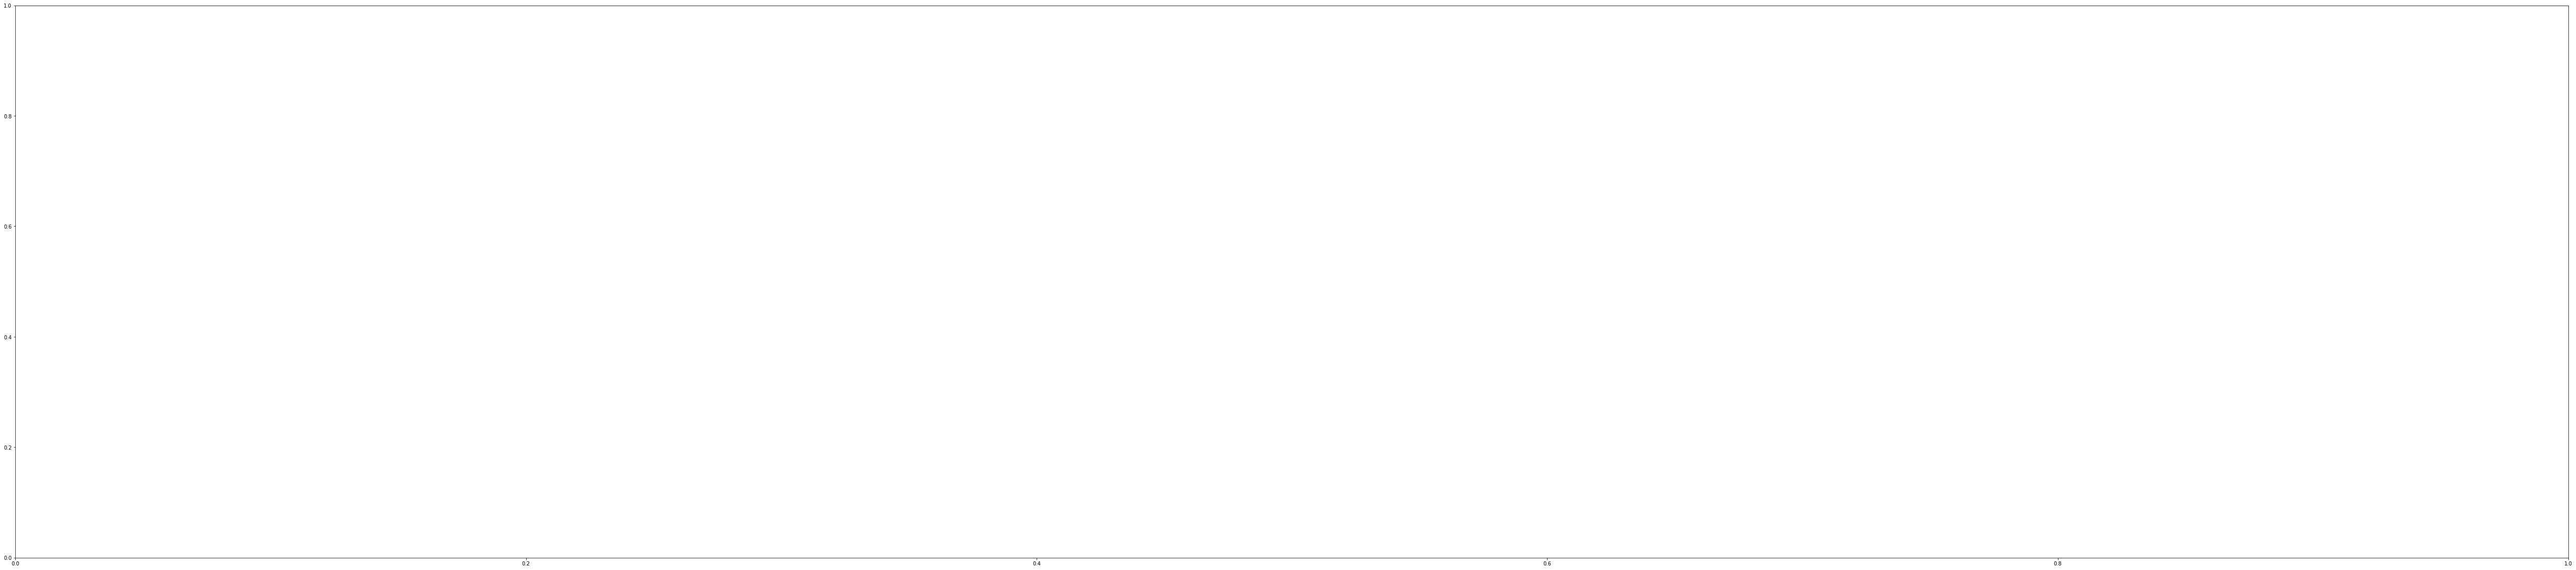

In [3]:
%matplotlib inline
plt.subplots(figsize=(90,20))
msno.bar(train_data)
# pls help with this error message below

In [ ]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'missing_ratio'])
missing_data.head(20)

Delete features (columns) that have 5 or more missing values.

In [ ]:
df = len(train_data.isnull()) 
df

In [ ]:
print("No. of columns not containing null values")
print(len(train_data.columns[train_data.notna().all()]))

In [ ]:
print("No. of columns containing null values")
print(len(train_data.columns[train_data.isna().any()]))

In [ ]:
threshold = 5
missing_features = missing_data.query("Total >= {}".format(threshold)).index
missing_features

In [ ]:
drop_features = train_data.drop(missing_features, axis=1)
display(drop_features)

In [ ]:
row_drop = drop_features.dropna(axis=0) 
row_drop = row_drop.reset_index(drop=True)
row_drop


# [Problem 5] Researching terminology

**Skewness:** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis:** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

# [Problem 6] Confirming distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [ ]:
for col in train_data[['SalePrice']]:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[col].kurt())  
         )

In [ ]:
sns.set_theme(); np.random.seed(0)
sns.distplot(train_data['SalePrice'], kde=False, bins=10)

In [ ]:
sns.set_theme(); np.random.seed(0)
target_var = train_data['SalePrice']
sns.distplot(target_var)
plt.show()

log transform

In [ ]:
log_data = np.log(train_data['SalePrice'])
sns.set_theme(); np.random.seed(0)

sns.distplot(log_data);
# skewness and kurtosis
print("Skewness: %f" % log_data.skew())
print("Kurtosis: %f" % log_data.kurt())
# dropping old column
#df_train.drop('SalePrice', axis= 1, inplace=True)

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
target_log = target_var.apply(np.log)
sns.distplot(target_log, kde=False, bins=10)

In [ ]:
sns.distplot(log_data, bins=10)

# [Problem 7] Confirming the correlation coefficient

In [ ]:
# Creating a heat map of the correlation coefficient matrix 
data_corr = train_data.corr()
plt.figure(figsize=(16, 13))
plt.title('Correlatiom matrix')
sns.heatmap(data_corr, vmax=1, annot=False, cmap='BrBG')
plt.show()

In [ ]:
#10 features that have a high correlation with the target variable
corr_target = data_corr[['SalePrice']].sort_values(by=['SalePrice'], ascending=False)
corr_target[1:11]

In [ ]:
# create a correlation coefficient matrix heat map
target_corr_matrix = train_data[corr_target[1:11].index]
display(target_corr_matrix)

In [ ]:
plt.subplots(figsize=(15,12))
plt.title('Correlatiom matrix')
sns.heatmap(target_corr_matrix.corr(), vmax=1, annot=True, cmap="YlGnBu")
plt.show()

This features dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
- YearBuilt: Original construction date<br>
- 1stFlrSF: First Floor square feet<br>
- FullBath: Full bathrooms above <br>
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
- GarageArea: Size of garage in square feet<br>
- GarageCars: Size of garage in car capacity <br>
- TotalBsmtSF: Total square feet of basement <br>
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
- OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

3 combinations with high Correlatiom coefficients with each other.
- GarageArea and GarageCar = 0.88
- 1stFlrSF and TotalBsmtSF = 0.82
- GrLivArea andTotRmsAbvGrd = 0.83   